# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `Customer-Churn.txt` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset.

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
    - Downsampling
    - Upsampling - Method 1
    - Upsampling using SMOTE
    - Downsampling using Tomeklinks

- Each time fit the model and see how the accuracy of the model is.

# My Code

### 1.- Import the required libraries and modules that you would need.

In [2]:
# manejo bbdd
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

### 2.- Read that data into Python and call the dataframe `churnData`.

In [3]:
churnData = pd.read_csv('Customer-Churn.txt')

In [4]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [8]:
#Lo primero es realizar un .info()
chunrData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
#Vamos a hacer un describe
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#Vemos los 5 primeros valores
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [7]:
#Vemos los 5 últimos valores
churnData.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,Yes,No,Yes,Yes,Yes,Yes,Two year,105.65,6844.5,No


### 3.- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.

In [8]:
#Vamos a ver el tipo de cada columna
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Voy aconvertir la columna `TotalCharges` de tipo objeto a tipo numérico.
churnData['TotalCharges']=pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [10]:
#Comprobamos que se ha realizado.
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### 4.- Check for null values in the dataframe. Replace the null values.

In [12]:
#Vamos a ver si tenemos nulos en el DataFrame
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Vemos que tenemos 11 nulos en la columna ´TotalCarges´. Vamos aver comos son esos valores nulos.

In [13]:
#Miramos el porcentaje de nulos de cada columna.
nulls_percent_df = pd.DataFrame(churnData.isna().sum()/len(churnData)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,gender,0.000000
1,SeniorCitizen,0.000000
2,Partner,0.000000
3,Dependents,0.000000
4,tenure,0.000000
5,PhoneService,0.000000
6,OnlineSecurity,0.000000
7,OnlineBackup,0.000000
8,DeviceProtection,0.000000
9,TechSupport,0.000000


In [14]:
churnData['TotalCharges'].value_counts()

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

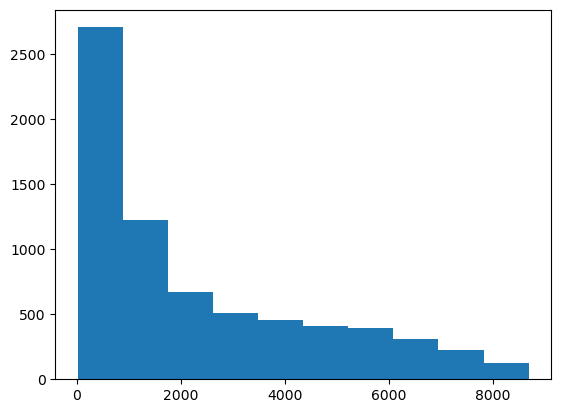

In [15]:
#Vamos a realizar un histograma para visualizar los datos
plt.hist(churnData['TotalCharges'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

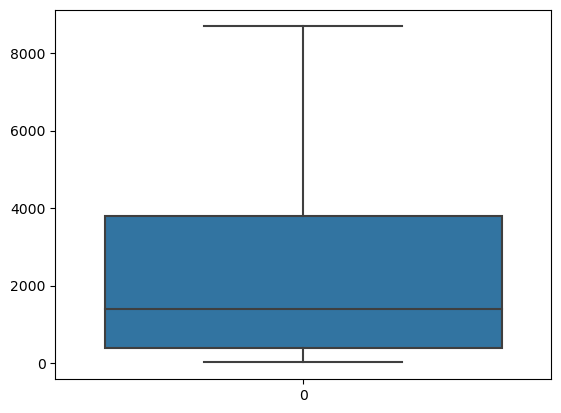

In [16]:
#Voy a realizar un boxplot para mirar si tenemos outliers.
sns.boxplot(churnData['TotalCharges'])
plt.show

No tenemos outliers. Voy a imputar los nulos con la mediana, ya que des esta manera es una opción que es más robusta debido a que es menos sensible a pequeñas desviaciones.

In [17]:
churnData['TotalCharges'].fillna(churnData['TotalCharges'].median(), inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

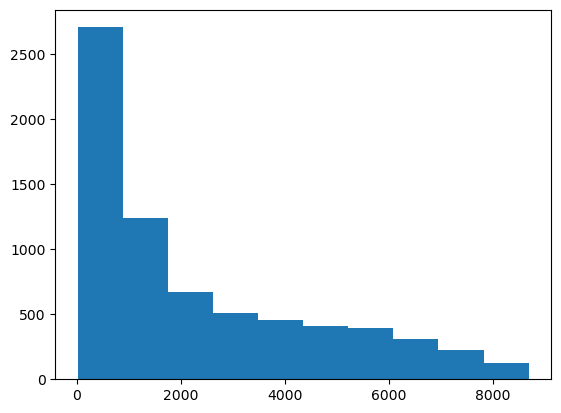

In [18]:
#Vamos a realizar un histograma para visualizar los datos
plt.hist(churnData['TotalCharges'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

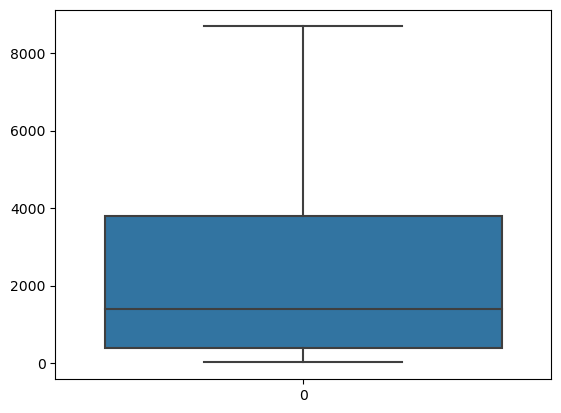

In [19]:
sns.boxplot(churnData['TotalCharges'])
plt.show

In [20]:
#Antes de continuar, voy a realizar las buenas practicas y poner las columnas en minúscula y substituir los espacios por "_".
stand_col = []
for i in range(len(churnData.columns)):
    stand_col.append(churnData.columns[i].lower().replace(' ','_'))
churnData.columns = stand_col

In [21]:
churnData.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [22]:
#Voy a modificar algunas columnas para que se puedan leer mejor.
churnData.rename(columns={'seniorcitizen': 'senior_citizen', 
                          'phoneservice': 'phone_service', 
                          'onlinesecurity': 'online_security', 
                          'onlinebackup':'online_backup', 
                          'deviceprotection':'device_protection',
                          'techsupport':'tech_support',
                          'streamingtv':'streaming_tv',
                          'streamingmovies':'streaming_movies',
                          'monthlycharges':'monthly_charges',
                          'totalcharges':'total_charges',
                         
}, inplace=True)

In [23]:
churnData

,gender,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


### 5. - Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

In [24]:
#Voy a crear un DataFrame con las columnas, `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
features = churnData[['tenure', 'senior_citizen', 'monthly_charges', 'total_charges']]
features

,tenure,senior_citizen,monthly_charges,total_charges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


Paralelamente voy a convertir la variable objeto 'chunr' de un formato categorico "yes, no" a un formato numérico "0, 1". 
De esta manera estandarizo el proceso de modelado. Lo realizaré con una fución lambda al igual que nos han enseñado en clase.

In [38]:
target = churnData['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [40]:
target = target.to_frame(name='churn')
target

,churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [41]:
# Por ultimo voy a realizar un fit_transform a las features, para escalar las características de los datos.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [50]:
scaled_features

array([[-1.27744458, -0.43991649, -1.16032292, -0.99424194],
       [ 0.06632742, -0.43991649, -0.25962894, -0.17324413],
       [-1.23672422, -0.43991649, -0.36266036, -0.95967407],
       ...,
       [-0.87024095, -0.43991649, -1.1686319 , -0.85446945],
       [-1.15528349,  2.27315869,  0.32033821, -0.87206242],
       [ 1.36937906, -0.43991649,  1.35896134,  2.01428802]])

In [51]:
scaled_features =pd.DataFrame(scaled_features, columns=['tenure', 'senior_citizen', 'monthly_charges', 'total_charges'])

In [52]:
scaled_features

,tenure,senior_citizen,monthly_charges,total_charges
0,-1.277445,-0.439916,-1.160323,-0.994242
1,0.066327,-0.439916,-0.259629,-0.173244
2,-1.236724,-0.439916,-0.362660,-0.959674
3,0.514251,-0.439916,-0.746535,-0.194766
4,-1.236724,-0.439916,0.197365,-0.940470
...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.128655
7039,1.613701,-0.439916,1.277533,2.243151
7040,-0.870241,-0.439916,-1.168632,-0.854469
7041,-1.155283,2.273159,0.320338,-0.872062


Divido los datos en un conjunto de entrenamiento y un conjunto de prueba.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

Ajusto un modelo de regresión logística a los datos de entrenamiento. Con el objetivo de construir un modelo de clasificación inicial para predecir la probabilidad de que un cliente abandone la empresa y evaluar su rendimiento.

In [44]:
#Voy a crear el modelo de regresión logística.
log_reg = LogisticRegression()

#Ajusto el modelo a los datos de entrenamiento.
log_reg.fit(X_train, y_train)

# Voy a hacer predicciones en los datos de prueba.
y_pred = log_reg.predict(X_test)

# Verifico la precisión del modelo.
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Genero el informe de clasificación:
print(classification_report(y_test, y_pred))

Precisión: 0.8069552874378992
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



Nota : Hasta el momento no hemos balanceado los datos.

### 6.- Gestionar el desequilibrio en el conjunto de datos.

In [45]:
# Voy a ver si hay desbalance/desequilibrio en la variable objetivo. Vamos a comprobar el desequilibrio.
target.value_counts()

churn
0        5174
1        1869
Name: count, dtype: int64

In [46]:
target

,churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


Vemos que tenemos un desbalance de los datos.

### 7.- Utilice las estrategias de remuestreo utilizadas en clase para aumentar y disminuir la resolución y crear un equilibrio entre las dos clases.

- Reducción de resolución
- Muestreo superior: método 1
- Muestreo mejorado usando SMOTE
- Reducción de resolución usando Tomeklinks

Cada vez ajuste el modelo y vea cuál es la precisión del modelo.

#### 7.1.- Downsampling

Con este método lo que voy a realizar es reducir la cantidad de ejemplos de la clase mayoritaria.

In [59]:
# He creado las categorías basadas en el valor de la variable objetivo.
category_0 = scaled_features[target['churn'] == 0]
category_1 = scaled_features[target['churn'] == 1]

# Realizo un submuestreo de la clase mayoritaria (category_0) para igualar la clase minoritaria (category_1)
category_0 = category_0.sample(len(category_1), random_state=42)

# Voy a verificar el tamaño de las categorías.
print(category_0.shape)
print(category_1.shape)  

# Realizo la concatenación de las dos categorías.
data_balanced = pd.concat([category_0, category_1], axis=0)

# Hago un sample de los datos.
data_balanced = data_balanced.sample(frac=1, random_state=42)

# Concateno la columna 'churn' con los datos balanceados
data_balanced['churn'] = target.loc[data_balanced.index, 'churn']

# Verificación del balance en la variable objetivo.
print(data_balanced['churn'].value_counts())

# Separo las características y la variable objetivo.
X = data_balanced.drop(columns=['churn'])
y = data_balanced['churn']

# Divido los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajusto el modelo.
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Realizo las predicciones.
y_pred = log_reg.predict(X_test)

# Calculo la accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Printeo el reporte de clasificación
print(classification_report(y_test, y_pred))


(1869, 4)
(1869, 4)
churn
0    1869
1    1869
Name: count, dtype: int64
Accuracy: 0.7433155080213903
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       376
           1       0.74      0.74      0.74       372

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



#### 7.2.- Sobremuestreo (Upsampling) - Método 1

Aumentamos la cantidad de ejemplos de la clase minoritaria.
Objetivo: Balancear las clases aumentando la cantidad de ejemplos de la clase minoritaria.

In [60]:
# Upsampling de la clase minoritaria (category_1) para igualar la clase mayoritaria (category_0)
category_1_upsampled = category_1.sample(len(category_0), replace=True, random_state=42)

# Verificación del tamaño de las categorías.
print(category_0.shape)
print(category_1_upsampled.shape)  

# Concatenación de las dos categorías.
data_balanced = pd.concat([category_0, category_1_upsampled], axis=0)

# Realizo un sample de los datos.
data_balanced = data_balanced.sample(frac=1, random_state=42)

# Concatenar la columna 'churn' con los datos balanceados.
data_balanced['churn'] = target.loc[data_balanced.index, 'churn']

# Verificación del balance en la variable objetivo.
print(data_balanced['churn'].value_counts())

# Separar las características y la variable objetivo.
X = data_balanced.drop(columns=['churn'])
y = data_balanced['churn']

# Dividir los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajusto el modelo.
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Hago la predicción.
y_pred = log_reg.predict(X_test)

# Voy a calcular la accuracy.
print("Accuray:", accuracy_score(y_test, y_pred))

# Reporte de clasificación.
print(classification_report(y_test, y_pred))


(1869, 4)
(1869, 4)
churn
0    1869
1    1869
Name: count, dtype: int64
Accuray: 0.7419786096256684
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       376
           1       0.74      0.73      0.74       372

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



#### 7.3.- Sobremuestreo usando SMOTE

Utilizo SMOTE para generar nuevos datos de la clase minoritaria y balancear las clases.

In [61]:
# Separo las características y la variable objetivo.
X = scaled_features
y = target['churn']

# Divido los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplico SMOTE al conjunto de entrenamiento.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verifico el balance en la variable objetivo después de SMOTE.
print(y_train_smote.value_counts())

# Ajusto el modelo.
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Realizo las predicciones.
y_pred = log_reg.predict(X_test)

# Calculo la accuracy.
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte de clasificación.
print(classification_report(y_test, y_pred))

churn
0    4139
1    4139
Name: count, dtype: int64
Accuracy: 0.7260468417317246
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1035
           1       0.49      0.76      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.73      0.74      1409



#### 7.4.- Submuestreo usando TomekLinks

Utilizo Tomek Links para eliminar ejemplos ambiguos de la clase mayoritaria y balancear las clases.

In [62]:
# Separo las características y la variable objetivo.
X = scaled_features
y = target['churn']

# Divido los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplico TomekLinks.
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Verificar el balance en la variable objetivo después de aplicar Tomek Links.
print(y_train_tomek.value_counts())

# Entreno el Modelo.
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_tomek, y_train_tomek)

# Evaluo el Modelo.
y_pred = log_reg.predict(X_test)

# Calculo la accuracy.
print("Accuracy:", accuracy_score(y_test, y_pred))

# Printeo de clasificación.
print(classification_report(y_test, y_pred))

churn
0    3724
1    1495
Name: count, dtype: int64
Accuracy: 0.7799858055358411
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.59      0.54      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

